In [27]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.model_selection import cross_validate, ShuffleSplit

In [28]:
url = 'https://raw.githubusercontent.com/digipodium/Datasets/main/regression/diamond_pricing.csv'
df = pd.read_csv(url)
df.head()

,Paleonium,Pressure,Price
0,17,6567,2810.280298
1,59,5253,1986.967089
2,123,9715,2083.132087
3,182,2073,2236.340285
4,133,6400,1903.323339


In [29]:
# divide data into input and output (X,y)
X = df.drop('Price', axis=1)
y = df['Price']

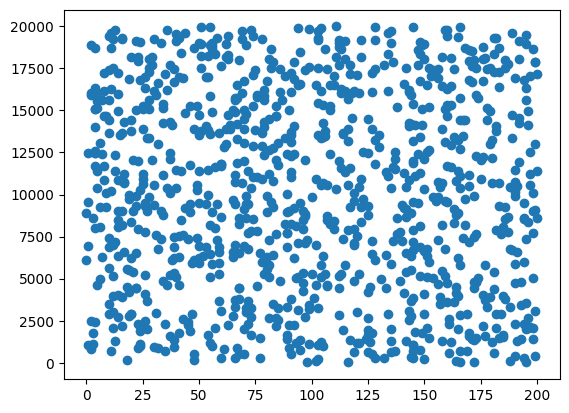

In [30]:
plt.scatter('Paleonium', 'Pressure', data=X)

In [31]:
# split data into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
model = DecisionTreeRegressor()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
# metrics
print('MSE', mean_squared_error(y_test, y_pred))
print('MAE', mean_absolute_error(y_test, y_pred))
print('R2', r2_score(y_test, y_pred))

MSE 17613.847648466475
MAE 97.84468258318502
R2 0.959131584396612


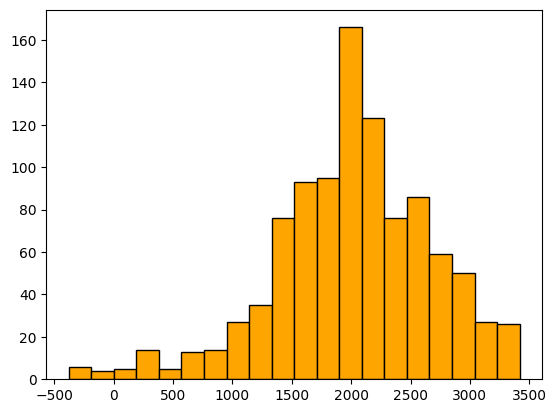

In [32]:
plt.hist(y, bins=20,edgecolor='black', color='orange')
plt.show()

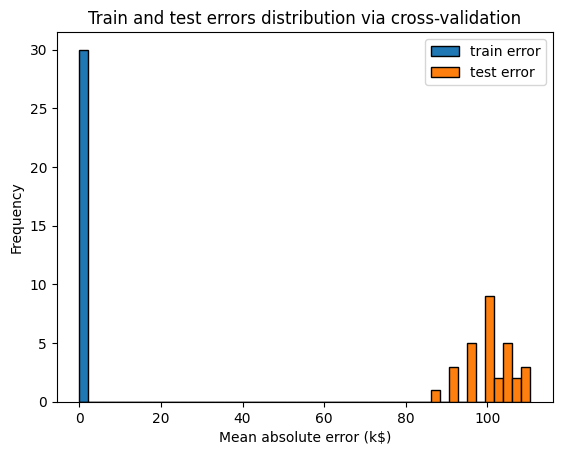

In [33]:
cv = ShuffleSplit(n_splits=30, test_size=0.2)
cv_results = cross_validate(
    model,
    X,
    y,
    cv=cv,
    scoring="neg_mean_absolute_error",
    return_train_score=True,
    n_jobs=-1,
)
cv_results = pd.DataFrame(cv_results)
scores = pd.DataFrame()
scores[["train error", "test error"]] = -cv_results[
    ["train_score", "test_score"]
]
scores.plot.hist(bins=50, edgecolor="black")
plt.xlabel("Mean absolute error (k$)")
_ = plt.title("Train and test errors distribution via cross-validation")

# model overfitting, not good to use

CPU times: total: 15.6 ms
Wall time: 1.23 s


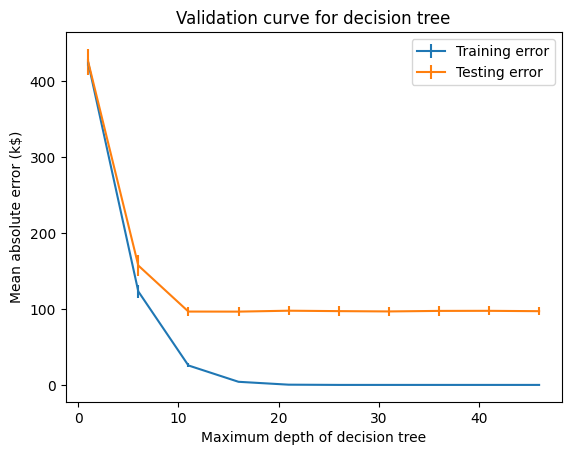

In [37]:
%%time
from sklearn.model_selection import validation_curve

max_depth = list(range(1, 50, 5))
train_scores, test_scores = validation_curve(
    model,
    X,
    y,
    param_name="max_depth",
    param_range=max_depth,
    cv=cv,
    scoring="neg_mean_absolute_error",
    n_jobs=2,
)
train_errors, test_errors = -train_scores, -test_scores
plt.errorbar(
    max_depth,
    train_errors.mean(axis=1),
    yerr=train_errors.std(axis=1),
    label="Training error",
)
plt.errorbar(
    max_depth,
    test_errors.mean(axis=1),
    yerr=test_errors.std(axis=1),
    label="Testing error",
)
plt.legend()

plt.xlabel("Maximum depth of decision tree")
plt.ylabel("Mean absolute error (k$)")
_ = plt.title("Validation curve for decision tree")

In [38]:
model = DecisionTreeRegressor(max_depth=10)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
# metrics
print('MSE', mean_squared_error(y_test, y_pred))
print('MAE', mean_absolute_error(y_test, y_pred))
print('R2', r2_score(y_test, y_pred))

MSE 18334.52423965747
MAE 100.54727811004994
R2 0.9574594392167375


In [43]:
DecisionTreeRegressor?

Init signature:
DecisionTreeRegressor(
    *,
    criterion='squared_error',
    splitter='best',
    max_depth=None,
    min_samples_split=2,
    min_samples_leaf=1,
    min_weight_fraction_leaf=0.0,
    max_features=None,
    random_state=None,
    max_leaf_nodes=None,
    min_impurity_decrease=0.0,
    ccp_alpha=0.0,
)
Docstring:     
A decision tree regressor.

Read more in the :ref:`User Guide <tree>`.

Parameters
----------
criterion : {"squared_error", "friedman_mse", "absolute_error",             "poisson"}, default="squared_error"
    The function to measure the quality of a split. Supported criteria
    are "squared_error" for the mean squared error, which is equal to
    variance reduction as feature selection criterion and minimizes the L2
    loss using the mean of each terminal node, "friedman_mse", which uses
    mean squared error with Friedman's improvement score for potential
    splits, "absolute_error" for the mean absolute error, which minimizes
    the L1 loss usi

# grid search

In [41]:
from sklearn.model_selection import GridSearchCV

In [42]:
GridSearchCV?

Init signature:
GridSearchCV(
    estimator,
    param_grid,
    *,
    scoring=None,
    n_jobs=None,
    refit=True,
    cv=None,
    verbose=0,
    pre_dispatch='2*n_jobs',
    error_score=nan,
    return_train_score=False,
)
Docstring:     
Exhaustive search over specified parameter values for an estimator.

Important members are fit, predict.

GridSearchCV implements a "fit" and a "score" method.
It also implements "score_samples", "predict", "predict_proba",
"decision_function", "transform" and "inverse_transform" if they are
implemented in the estimator used.

The parameters of the estimator used to apply these methods are optimized
by cross-validated grid-search over a parameter grid.

Read more in the :ref:`User Guide <grid_search>`.

Parameters
----------
estimator : estimator object
    This is assumed to implement the scikit-learn estimator interface.
    Either estimator needs to provide a ``score`` function,
    or ``scoring`` must be passed.

param_grid : dict or list of

In [51]:
param_grid = {
    'max_depth': list(range(2, 25)),
    'criterion' : ["squared_error", "friedman_mse", "absolute_error","poisson"],
    'min_samples_split' : list(range(2, 5)),
}
model = DecisionTreeRegressor()
cv = ShuffleSplit(n_splits=10, test_size=0.2)
grid = GridSearchCV(
    estimator=model,
    param_grid =param_grid,
    scoring='neg_mean_absolute_error',
    n_jobs=-1,
    cv=cv,
    verbose=1,
)   

In [52]:
# parameters
grid.fit(X_train, y_train)

Fitting 10 folds for each of 1472 candidates, totalling 14720 fits


c:\Users\ZAID\miniconda3\lib\site-packages\sklearn\model_selection\_validation.py:425: FitFailedWarning: 
3680 fits failed out of a total of 14720.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
3680 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\ZAID\miniconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 732, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\ZAID\miniconda3\lib\site-packages\sklearn\base.py", line 1151, in wrapper
    return fit_method(estimator, *args, **kwargs)
  File "c:\Users\ZAID\miniconda3\lib\site-packages\sklearn\tree\_classes.py", line 1320, in fit
    super()._fit(
  File "c:\Users\ZAID\miniconda3\lib\site-packag

GridSearchCV(cv=ShuffleSplit(n_splits=10, random_state=None, test_size=0.2, train_size=None),
             estimator=DecisionTreeRegressor(), n_jobs=-1,
             param_grid={'criterion': ['squared_error', 'friedman_mse',
                                       'absolute_error', 'poisson'],
                         'max_depth': [2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,
                                       14, 15, 16, 17, 18, 19, 20, 21, 22, 23,
                                       24],
                         'min_samples_split': [2, 3, 4, 5, 6, 7, 8, 9],
                         'splitter': ['best', 'random']},
             scoring='neg_mean_absolute_error', verbose=1)

In [53]:
grid.best_params_

{'criterion': 'squared_error',
 'max_depth': 12,
 'min_samples_split': 2,
 'splitter': 'best'}

In [57]:
result = pd.DataFrame(grid.cv_results_)
result.sort_values('rank_test_score').head(10)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_criterion,param_max_depth,param_min_samples_split,param_splitter,params,split0_test_score,...,split3_test_score,split4_test_score,split5_test_score,split6_test_score,split7_test_score,split8_test_score,split9_test_score,mean_test_score,std_test_score,rank_test_score
160,0.011443,0.008768,0.003610,0.001814,squared_error,12,2,best,"{'criterion': 'squared_error', 'max_depth': 12...",-92.562604,...,-100.163530,-106.989270,-99.105584,-112.345676,-90.414766,-126.567213,-99.938789,-102.903471,9.911847,1
544,0.005991,0.000568,0.003011,0.000224,friedman_mse,13,2,best,"{'criterion': 'friedman_mse', 'max_depth': 13,...",-90.587443,...,-100.218200,-108.503663,-102.361407,-110.382576,-96.304302,-124.945721,-99.578170,-103.115238,9.031953,2
162,0.009569,0.007659,0.002769,0.001758,squared_error,12,3,best,"{'criterion': 'squared_error', 'max_depth': 12...",-93.505565,...,-102.666507,-106.065074,-98.083887,-113.646626,-93.042984,-123.695917,-102.147954,-103.118130,8.914487,3
210,0.010924,0.012641,0.003358,0.002173,squared_error,15,3,best,"{'criterion': 'squared_error', 'max_depth': 15...",-94.862966,...,-106.851680,-112.746194,-98.815940,-107.678425,-94.643469,-121.185415,-98.751513,-103.303895,8.195376,4
194,0.006824,0.002008,0.003565,0.000934,squared_error,14,3,best,"{'criterion': 'squared_error', 'max_depth': 14...",-92.562165,...,-109.030928,-110.021745,-96.728898,-108.530446,-98.606293,-121.632412,-101.531649,-103.439520,8.279436,5
192,0.008888,0.003920,0.003109,0.000804,squared_error,14,2,best,"{'criterion': 'squared_error', 'max_depth': 14...",-86.105800,...,-106.661806,-113.732939,-98.519339,-120.434143,-95.676659,-120.417773,-96.637765,-103.611592,10.858930,6
560,0.007071,0.001085,0.003319,0.001583,friedman_mse,14,2,best,"{'criterion': 'friedman_mse', 'max_depth': 14,...",-90.903665,...,-101.392418,-107.904363,-103.659783,-115.031551,-97.800698,-120.197691,-100.186947,-103.624376,8.185644,7
530,0.010439,0.012858,0.002308,0.001272,friedman_mse,12,3,best,"{'criterion': 'friedman_mse', 'max_depth': 12,...",-90.826302,...,-104.489157,-110.162574,-100.345232,-111.203807,-95.977043,-125.404230,-99.912124,-103.714688,9.264970,8
180,0.006767,0.001901,0.002621,0.001626,squared_error,13,4,best,"{'criterion': 'squared_error', 'max_depth': 13...",-91.498956,...,-104.332371,-108.886221,-94.376145,-115.145813,-91.066045,-129.015135,-105.628739,-103.724115,11.179108,9
546,0.007042,0.002765,0.003618,0.001395,friedman_mse,13,3,best,"{'criterion': 'friedman_mse', 'max_depth': 13,...",-89.565036,...,-101.554838,-112.642389,-102.035711,-114.491736,-93.338054,-127.356268,-102.379412,-103.787618,10.752784,10


In [59]:
final_model = DecisionTreeRegressor(**grid.best_params_)
final_model.fit(X_train, y_train)
y_pred = final_model.predict(X_test)
# metrics
print('MSE', mean_squared_error(y_test, y_pred))
print('MAE', mean_absolute_error(y_test, y_pred))
print('R2', r2_score(y_test, y_pred))

MSE 15615.157525343508
MAE 93.35874418456594
R2 0.9637690321731793


In [ ]:
from sklearn.ensemble import RandomForestRegressor